In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

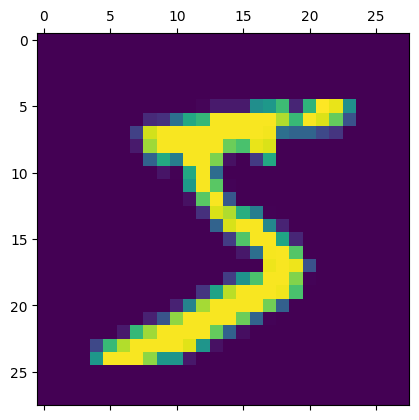

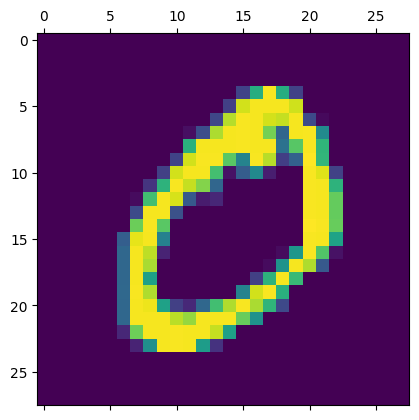

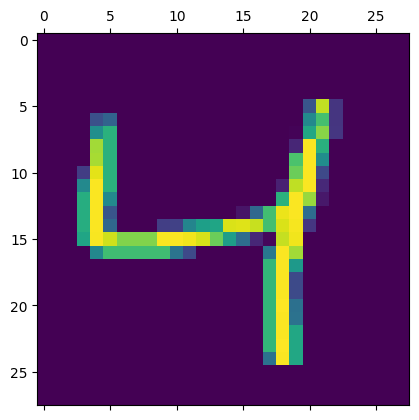

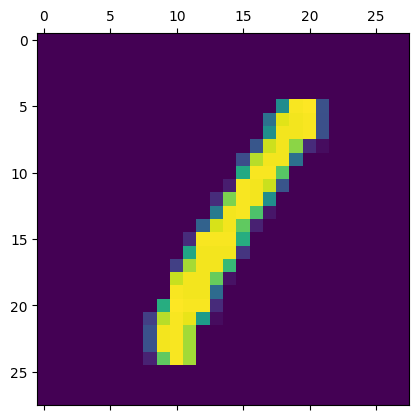

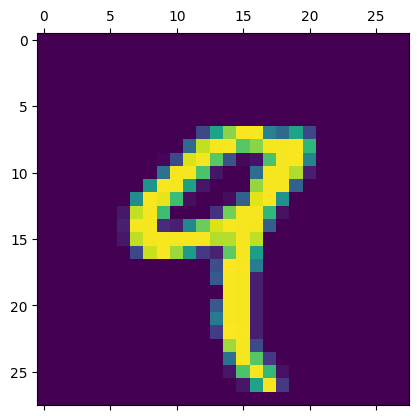

In [5]:
for i in range(5):
  plt.matshow(X_train[i])

In [6]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
X_train=X_train/255
X_test=X_test/255

In [14]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [15]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [16]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8180 - loss: 0.7157
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9131 - loss: 0.3105
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9203 - loss: 0.2869
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9237 - loss: 0.2750
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9271 - loss: 0.2642


In [17]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9139 - loss: 0.3015


[0.2665632665157318, 0.9251999855041504]

In [18]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([2.55724024e-02, 3.85950216e-07, 7.15025514e-02, 9.61897075e-01,
       4.42361413e-03, 1.45997092e-01, 1.77350887e-06, 9.99834359e-01,
       1.14200376e-01, 7.24175751e-01], dtype=float32)

In [19]:
np.argmax(y_predicted[0])

np.int64(7)

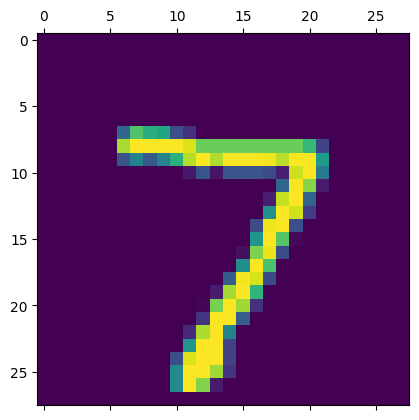

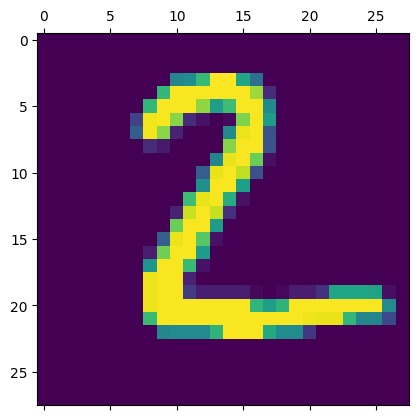

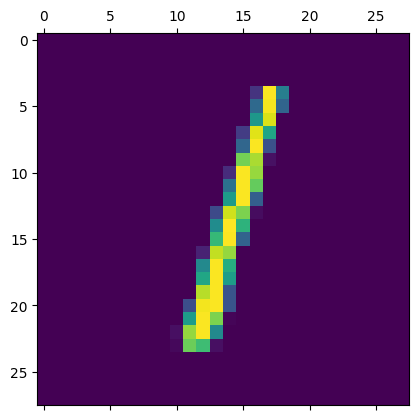

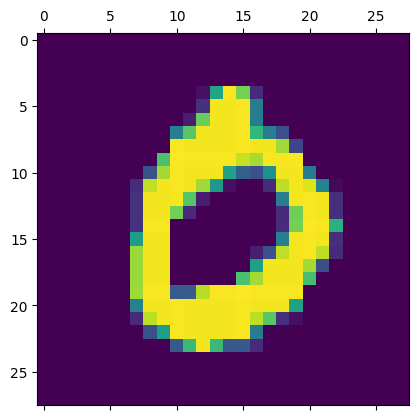

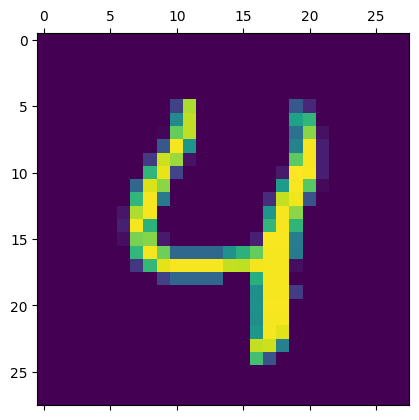

In [20]:
for i in range(5):
  plt.matshow(X_test[i])

In [23]:
for i in range(5):
  print(np.argmax(y_predicted[i]))


7
2
1
0
4


In [25]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

Text(95.72222222222221, 0.5, 'Truth')

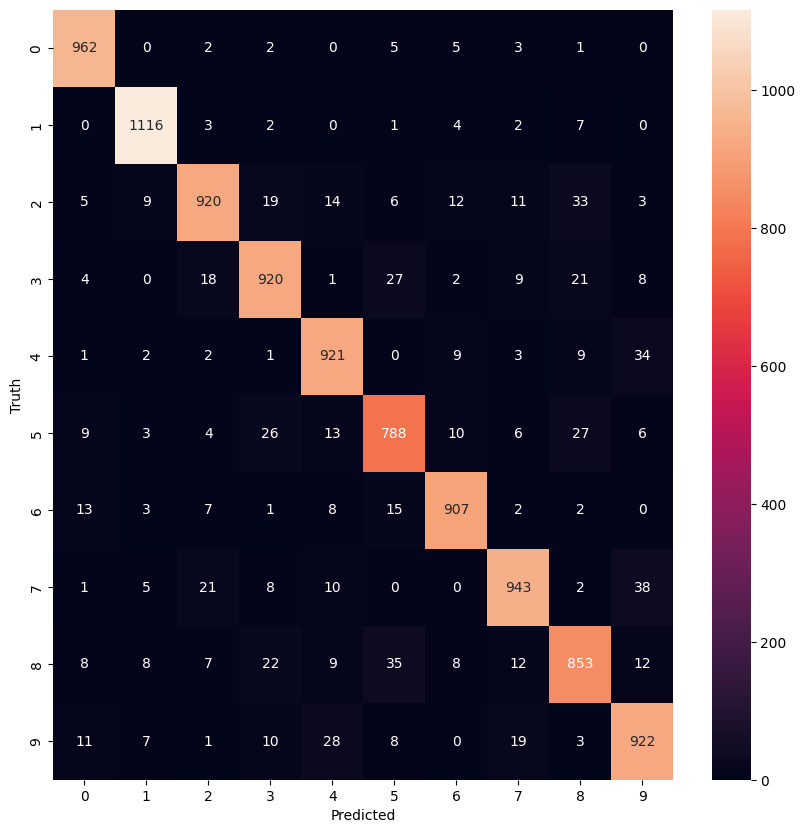

In [26]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Adding Hidden Layer


In [27]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8719 - loss: 0.4521
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9621 - loss: 0.1284
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9736 - loss: 0.0848
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9805 - loss: 0.0645
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9855 - loss: 0.0469


In [28]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9734 - loss: 0.0844


[0.07136279344558716, 0.9772999882698059]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


Text(95.72222222222221, 0.5, 'Truth')

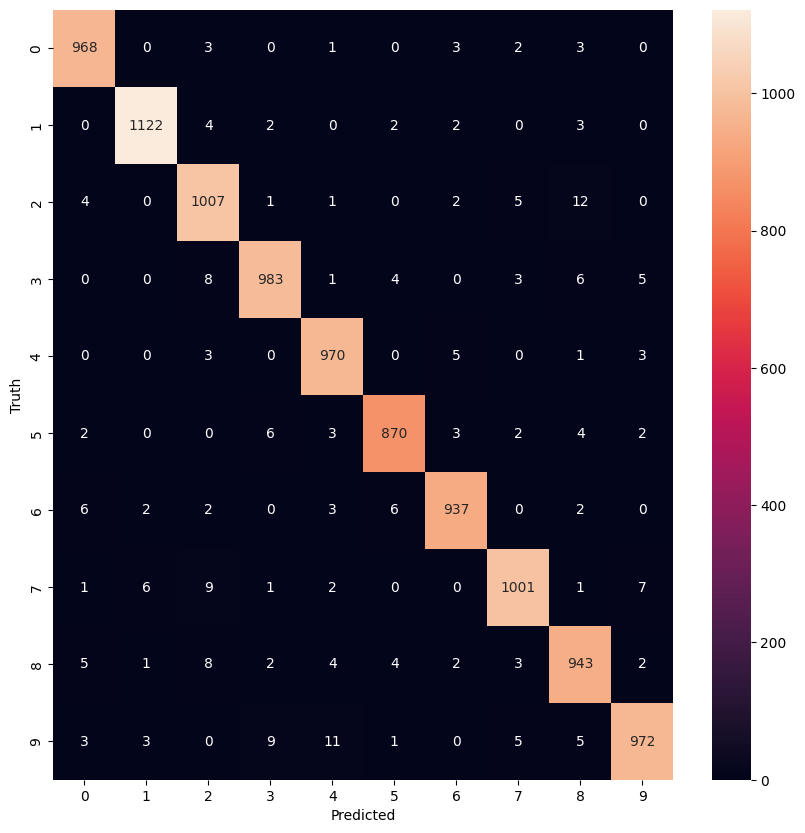

In [29]:
y_predicted_hiddenlayer=model.predict(X_test_flattened)
y_predicted_hiddenlayer_labels=[np.argmax(i) for i in y_predicted_hiddenlayer]
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_hiddenlayer_labels)
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Without Flattening the input data manually

In [30]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8723 - loss: 0.4531
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9624 - loss: 0.1286
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9742 - loss: 0.0857
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9814 - loss: 0.0628
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9846 - loss: 0.0494


In [31]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9693 - loss: 0.0938


[0.0837281197309494, 0.9739000201225281]